In [1]:
# import os + os.chir is used to get to the llms directory to use the usermodules 
import os
os.chdir('C:/Users/AViey/OneDrive/Documents/College/UCI/Stats/stats170a/copilot/copilot/llms/user_modules') 

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from  db import Session, get_training_data, get_model_sentiment_data
import pandas as pd

session = Session()

c:\Users\AViey\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
training_df = get_training_data()
training_df.head()

,dialogue_id,dataset,dialogue_text,actual_summary,actual_sentiment
0,3816,training,"#Person1#: Good morning, sir. Is there anythin...",#Person2# wants a suit made in 100 % black Bar...,neutral
1,3,training,"#Person1#: Excuse me, did you see a set of key...",#Person1#'s looking for a set of keys and asks...,positive
2,4,training,#Person1#: Why didn't you tell me you had a gi...,#Person1#'s angry because #Person2# didn't tel...,negative
3,5,training,"#Person1#: Watsup, ladies! Y'll looking'fine t...",Malik invites Nikki to dance. Nikki agrees if ...,positive
4,6,training,"#Person1#: Happy birthday, Aims!\n#Person2#: T...",Lisa gives Aims a birthday present and Aims lo...,positive


In [3]:
model_sentiment_df = get_model_sentiment_data("mistral 7b")
model_sentiment_df.head()

,sentiment_id,dialogue_id,model_id,generated_sentiment,gpu_sentiment_usage,memory_sentiment_usage,time_sentiment_taken
0,1,1,mistral 7b,neutral,None,None,None
1,2,2,mistral 7b,neutral,None,None,None
2,3,3,mistral 7b,positive,None,None,None
3,4,4,mistral 7b,negative,None,None,None
4,5,5,mistral 7b,positive,None,None,None


In [6]:
sentiment_df = pd.merge(training_df[["dialogue_id", "actual_sentiment"]],
                        model_sentiment_df[["dialogue_id", "generated_sentiment"]],
                        on="dialogue_id",
                        how="inner")
sentiment_df.head()

,dialogue_id,actual_sentiment,generated_sentiment
0,3816,neutral,positive
1,3,positive,positive
2,4,negative,negative
3,5,positive,positive
4,6,positive,positive


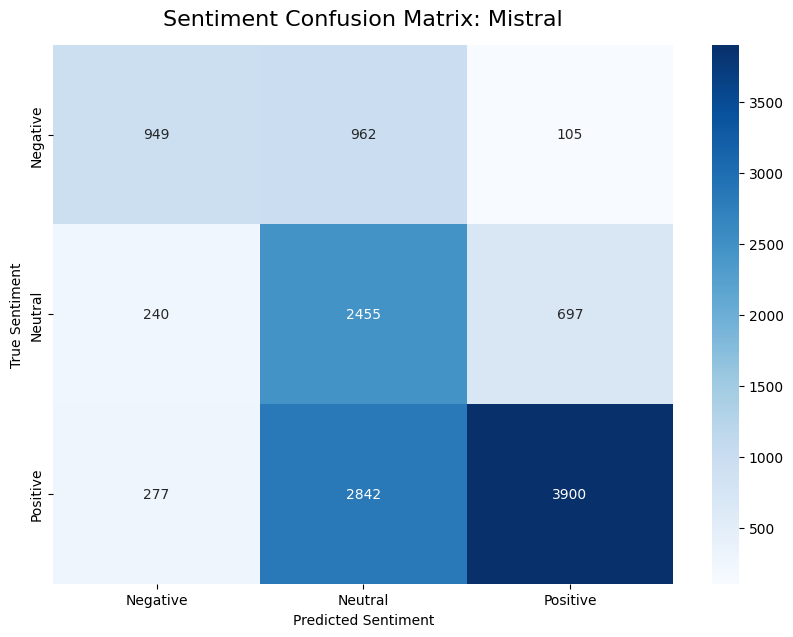

In [10]:
# Assuming binary_actual and binary_generated are your true and predicted labels converted to binary (if needed)
# For multi-class:
conf_matrix = confusion_matrix(sentiment_df['actual_sentiment'], sentiment_df['generated_sentiment'])

# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues",
            xticklabels=['Negative', 'Neutral', 'Positive'],
            yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel('Predicted Sentiment')
plt.ylabel('True Sentiment')
plt.title('Sentiment Confusion Matrix: Mistral', fontsize=16, pad=14)
plt.show()

In [14]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(sentiment_df["actual_sentiment"], sentiment_df["generated_sentiment"])
print(f"Overall accuracy: {accuracy:.2f}")

Overall accuracy: 0.59
